# Ridge Regression / Polynomial Expansion / k-fold Cross Validation / Validation Curve

In this programming exercise, you will implement a polynomial ridge regression and k-fold cross validation using only numpy. You will also plot a validation curve. DO NOT use libraries like scikit-learn or scipy.

Use the template provided in this notebook to implement ridge regression, polynomial expansion, k-fold cross validation, and plot a validation curve.

When done, paste the code into the quiz on Moodle and answer the questions.

## Provided

In [51]:
import numpy as np
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt
from typing import Optional

In [52]:
def load_data(name: str) -> tuple[ArrayLike, ArrayLike]:
    """Loads data from provided .npy files and returns the x and y values.
    Args:
        name (str): The file name of the .npy file to load.
    Returns:
        tuple[ArrayLike, ArrayLike]: The x and y values of the data. x has shape (n,) and y has shape (n,).
    """
    data = np.load(name)
    x, y = data.T
    return x, y

In [53]:
def shuffle_data(x: ArrayLike, y: ArrayLike) -> tuple[ArrayLike, ArrayLike]:
    """Shuffles the data using a random permutation.
    Args:
        x (ArrayLike): The input values of the data.
        y (ArrayLike): The target values of the data.
    Returns:
        tuple[ArrayLike, ArrayLike]: The shuffled x and y values.
    """
    rng = np.random.default_rng(seed=42)
    n = x.shape[0]
    indx = rng.permutation(n)
    return x[indx], y[indx]

In [54]:
def plot_regression(x: ArrayLike, y: ArrayLike, w: Optional[ArrayLike] = None) -> None:
    """Plot the data and linear regression model.
    Only for plotting 2D data.
    Args:
        x (ArrayLike): The input data of shape (n,).
        y (ArrayLike): The output data of shape (n,).
        w (ArrayLike, optional): The weight and bias of a linear regression. Defaults to None.
    """

    # Plot the data
    plt.plot(x, y, ".", markersize=8, color="#D81B60", label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid()

    # Plot the prediction
    if w is not None:
        deg = w.shape[0]
        x_plot = np.linspace(x.min(), x.max(), 100)
        X_plot = np.vander(x_plot, deg)

        # Set plotting range properly
        plt.ylim((np.min(y) * 1.2, np.max(y) * 1.2))

        plt.plot(x_plot, X_plot @ w, linewidth=2.5, color="#0BA462", label="Model")
        plt.legend()

    plt.tight_layout()
    plt.show()

In [55]:
def plot_validation_curve(
    lambdas: ArrayLike,
    train_losses: ArrayLike,
    val_losses: Optional[ArrayLike] = None,
) -> None:
    """Plots the validation curve.
    Args:
        lambdas (ArrayLike): The regularization values.
        train_losses (ArrayLike): The training losses.
        val_losses (ArrayLike, optional): The validation losses. Defaults to None.
    """

    plt.plot(lambdas, train_losses, color="#D81B60", linewidth=2.5, label="Train loss")
    if val_losses is not None:
        plt.plot(
            lambdas, val_losses, color="#1E88E5", linewidth=2.5, label="Valid loss"
        )
    plt.legend()
    plt.xscale("log")
    plt.xlabel("Lambda")
    plt.ylabel("Loss")
    plt.grid()
    plt.show()

## Implementation

In [88]:
def ridge_regression(x: ArrayLike, y: ArrayLike, lam: float = 0) -> ArrayLike:
    """Calculates the Ridge Regression (linear least-squares regression with l2-regularization) coefficients.
    Args:
        x (ArrayLike): The input data of shape (n, d).
        y (ArrayLike): The output data of shape (n,).
    Returns:
        ArrayLike: The ridge regression coefficients.
    """

    # Implement a solver for the problem from Task 1.
    # The solution is given by the normal equation:
    # (X^T * X + n * lambda * I) w = X^T * y
    xTx = x.T @ x
    n = x.shape[0] # number of samples
    return np.linalg.solve(xTx + n * lam * np.eye(xTx.shape[1]), x.T @ y)

In [95]:
def get_polynomial_features(x: ArrayLike, deg: int) -> ArrayLike:
    """Generates polynomial features of the input data to the specified degree.
    Args:
        x (ArrayLike): The input data of shape (n,).
        deg (int): The degree of the polynomial features.
    Returns:
        ArrayLike: The polynomial features of the input data of shape (n, d + 1) from 0 degree to deg degree.
    """

    # Implement a function that generates polynomial features of the input data.
    # The vander function creates a Vandermonde matrix:
    # this matrix contains the powers of the input data.
    return np.vander(x, deg + 1, increasing=False)

In [90]:
def empirical_loss(x: ArrayLike, y: ArrayLike, w: ArrayLike) -> float:
    """Calculates the loss of the linear least squares regression.
    Args:
        x (ArrayLike): The input data of shape (n, d).
        y (ArrayLike): The output data of shape (n,).
        w (ArrayLike): The weights of the model.
    Returns:
        float: The loss of the linear least squares regression.
    """
    n = x.shape[0]
    return np.linalg.norm(x @ w - y) ** 2 / n

In [103]:
def kfold(x: ArrayLike, y: ArrayLike, lam: float, k: int = 10) -> tuple[float, float]:
    """Performs k-fold cross-validation to evaluate the model's performance.
    Args:
        x (ArrayLike): The input data of shape (n, d).
        y (ArrayLike): The output data of shape (n,).
        lam (float): The regularization parameter.
        k (int, optional): The number of folds. Defaults to 10.
    Returns:
        tuple[float, float]: Average train and validation losses ¡¡PER DATA POINT!!.
    """

    # Implement k-fold cross validation.
    folds = np.array_split(np.arange(x.shape[0]), k)
    train_losses = []
    val_losses = []
    
    for fold in folds:
        x_train = np.delete(x, fold, axis=0)
        y_train = np.delete(y, fold, axis=0)

        w = ridge_regression(x_train, y_train, lam)
        
        train_loss = empirical_loss(x_train, y_train, w)
        train_loss_per_data_point = train_loss / len(y_train)
        train_losses.append(train_loss_per_data_point)

        x_val = x[fold]
        y_val = y[fold]
        val_loss = empirical_loss(x_val, y_val, w)
        val_loss_per_data_point = val_loss / len(y_val)
        val_losses.append(val_loss_per_data_point)
    return np.mean(train_losses), np.mean(val_losses)


In [ ]:
def get_validation_curve_data(
    x: ArrayLike, y: ArrayLike, lambdas: ArrayLike
) -> tuple[int, ArrayLike, ArrayLike]:
    """Computes the best lambda and returns its index and train and validation losses for lambdas.
    Args:
        x (ArrayLike): The input data of shape (n, d).
        y (ArrayLike): The output data of shape (n,).
        lambdas (ArrayLike): The range of lambda values to evaluate.
    Returns:
        int: The best lambda index based on the validation loss.
        ArrayLike: The training losses for each lambda value.
        ArrayLike: The validation losses for each lambda value.
    """

    # Implement a function that returns data required for plotting the validation curve.
    train_losses, val_losses = [], []
    for lam in lambdas:
        train_loss, val_loss = kfold(x, y, lam)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
    best_lambda_index = np.argmin(val_losses)
    return best_lambda_index, train_losses, val_losses  # return the index of the best lambda and the losses

## Testing

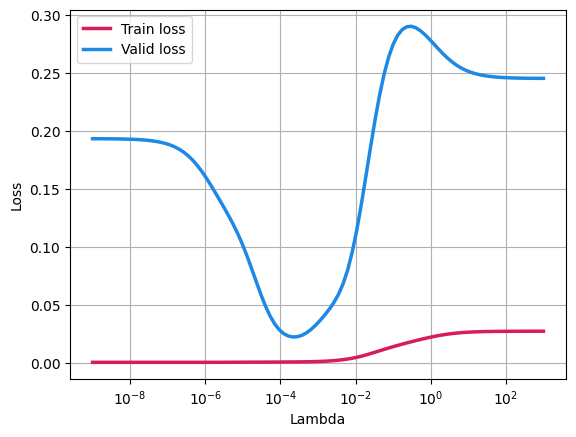

Best validation error 0.0223 
Corresponding train error 0.0007
Corresponding lambda 0.0002


In [107]:
# Data loading and preprocessing
x_train, y_train = load_data("dataset_poly_train.npy")
x_train, y_train = shuffle_data(x_train, y_train)

deg = 6
X_train = get_polynomial_features(x_train, deg=6)

# Validation curve
lambdas = np.logspace(-9, 3, num=100, base=10)
best_lam_idx, train_losses, val_losses = get_validation_curve_data(X_train, y_train, lambdas)

plot_validation_curve(lambdas, train_losses, val_losses)
print(f"Best validation error {val_losses[best_lam_idx]:.4f} ")
print(f"Corresponding train error {train_losses[best_lam_idx]:.4f}")
print(f"Corresponding lambda {lambdas[best_lam_idx]:.4f}")

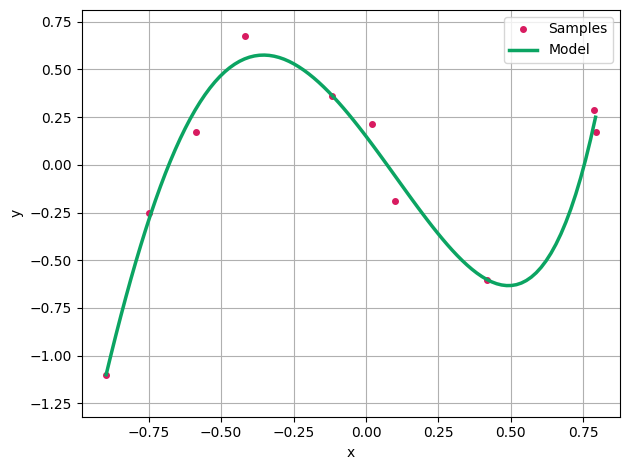

Train loss: 0.0073
Test loss: 0.0143


In [108]:
# Train on all training data with the best lambda
w = ridge_regression(X_train, y_train, lam=lambdas[best_lam_idx])
plot_regression(x_train, y_train, w)

# Compute train and test error
x_test, y_test = load_data("dataset_poly_test.npy")
X_test = get_polynomial_features(x_test, deg=6)

train_loss = empirical_loss(X_train, y_train, w)
test_loss = empirical_loss(X_test, y_test, w)
print(f"Train loss: {train_loss:.4f}")
print(f"Test loss: {test_loss:.4f}")